In [1]:
# We install Statsbomby since we will be using data from StatsBomb
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
competitions=sb.competitions()
# We get the names of the competitions
competitions.competition_name.unique()

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


array(['1. Bundesliga', 'Champions League', 'Copa del Rey',
       "FA Women's Super League", 'FIFA U20 World Cup', 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'Liga Profesional', 'Ligue 1',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [ ]:
condition=competitions.competition_name=='La Liga'
condition

0     False
1     False
2     False
3     False
4     False
      ...  
62    False
63    False
64    False
65    False
66    False
Name: competition_name, Length: 67, dtype: bool

In [ ]:
# We filter data from La Liga
LaLiga = competitions[condition]
LaLiga.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
35,11,90,Spain,La Liga,male,False,False,2020/2021,2023-07-26T14:11:01.312143,2023-07-26T14:15:15.217027,2023-07-26T14:15:15.217027,2023-07-26T14:11:01.312143
36,11,42,Spain,La Liga,male,False,False,2019/2020,2023-07-25T00:16:32.999467,2021-06-13T16:17:31.694,None,2023-07-25T00:16:32.999467
37,11,4,Spain,La Liga,male,False,False,2018/2019,2023-08-03T02:24:43.761907,2021-07-09T14:53:22.103024,None,2023-08-03T02:24:43.761907
38,11,1,Spain,La Liga,male,False,False,2017/2018,2023-07-24T13:03:48.574627,2021-06-13T16:17:31.694,None,2023-07-24T13:03:48.574627
39,11,2,Spain,La Liga,male,False,False,2016/2017,2023-07-25T00:14:55.260536,2021-06-13T16:17:31.694,None,2023-07-25T00:14:55.260536


# Particular player's passes throughout a match

In [ ]:
# We are using mplsoccer for the soccer pitch
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
from mplsoccer import Pitch, VerticalPitch

In [ ]:
# Defining the function of passes

def graph_passes(player_passes):
  h = 120
  w = 80

  pitch = Pitch()

  (fig, ax) = pitch.draw()
  for i in range(len(player_passes)):
    if player_passes['pass_outcome'].iloc[i] == 'Pass Offside':
      plt.plot((player_passes['x'].iloc[i], player_passes['xfinal'].iloc[i]), (player_passes['y'].iloc[i], player_passes['yfinal'].iloc[i]), color='gold', marker='X', linestyle='--', markevery=[1])
    elif player_passes['pass_outcome'].iloc[i] == 'Incomplete':
      plt.plot((player_passes['x'].iloc[i], player_passes['xfinal'].iloc[i]), (player_passes['y'].iloc[i], player_passes['yfinal'].iloc[i]), color='red', marker='X', linestyle='--', markevery=[1])
    else:
      plt.plot((player_passes['x'].iloc[i], player_passes['xfinal'].iloc[i]), (player_passes['y'].iloc[i], player_passes['yfinal'].iloc[i]), color='green', marker='X', linestyle='--', markevery=[1])

  # Creating the heat map
  sns.kdeplot(data=player_passes, x='x', y='y', fill=True, color='blue', alpha=0.3)
  title = player_passes.player.iloc[1] + ' passes'
  ax.set_title(title)
  plt.show()

In [ ]:
# Creating function to filter the data and get a player's passes in a specific match
def filter_player_passes():
  # We ask the user to give the competition and season id, as well as the selected team
  compid = input('Select your competition id')
  seasonid= input('Select your season id')
  selected_team = input('Select your team')
  tournament = sb.matches(competition_id=compid,season_id=seasonid)
  team_home = tournament[tournament.home_team == selected_team]
  team_away = tournament[tournament.away_team == selected_team]
  total_matches = pd.concat([team_home,team_away])
  # We print the matches of that team during the tournament to see the ids of the matchs
  print(total_matches, flush = True) #Need to improve this part
  # We ask the user to give a match id after reading the possible matchs ids
  idmatch = input('Select your match id')
  soccer_match = sb.events(match_id = idmatch)
  soccer_match_filtered = soccer_match[pd.notna(soccer_match['pass_end_location'])]
  # We define the positions of the passes in the match
  soccer_match_filtered['x'] = soccer_match_filtered.location.apply(lambda cell: cell[0])
  soccer_match_filtered['y'] = soccer_match_filtered.location.apply(lambda cell: cell[1])
  soccer_match_filtered['xfinal'] = soccer_match_filtered.pass_end_location.apply(lambda cell: cell[0])
  soccer_match_filtered['yfinal'] = soccer_match_filtered.pass_end_location.apply(lambda cell: cell[1])
  print(soccer_match_filtered.player.unique())
  # We ask the user to select a player
  selected_player = input('Select your player')
  player_passes_during_match = soccer_match_filtered[soccer_match_filtered.player.apply(lambda cell: True if selected_player in cell else False)]
  # We graph the player passes with the function that we created before
  graph_passes(player_passes_during_match)

Select your competition id11
Select your season id90
Select your teamBarcelona
    match_id  match_date      kick_off      competition     season  \
2    3773457  2021-05-16  18:30:00.000  Spain - La Liga  2020/2021   
6    3773660  2020-12-13  21:00:00.000  Spain - La Liga  2020/2021   
7    3773593  2020-09-27  21:00:00.000  Spain - La Liga  2020/2021   
9    3773585  2020-10-24  16:00:00.000  Spain - La Liga  2020/2021   
11   3773672  2020-10-04  21:00:00.000  Spain - La Liga  2020/2021   
14   3773377  2020-12-19  16:15:00.000  Spain - La Liga  2020/2021   
15   3773586  2021-04-29  19:00:00.000  Spain - La Liga  2020/2021   
16   3773372  2021-05-08  16:15:00.000  Spain - La Liga  2020/2021   
19   3773369  2021-03-15  21:00:00.000  Spain - La Liga  2020/2021   
20   3773661  2021-04-22  22:00:00.000  Spain - La Liga  2020/2021   
22   3773523  2020-12-16  21:00:00.000  Spain - La Liga  2020/2021   
26   3773526  2021-02-13  21:00:00.000  Spain - La Liga  2020/2021   
27   377347

<ipython-input-11-6ee3b55c70f4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soccer_match_filtered['x'] = soccer_match_filtered.location.apply(lambda cell: cell[0])
<ipython-input-11-6ee3b55c70f4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soccer_match_filtered['y'] = soccer_match_filtered.location.apply(lambda cell: cell[1])
<ipython-input-11-6ee3b55c70f4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

['Lionel Andrés Messi Cuccittini' 'Sergio Busquets i Burgos'
 'Sergi Roberto Carnicer' 'Gerard Piqué Bernabéu' 'Clément Lenglet'
 'Jordi Alba Ramos' 'Frenkie de Jong' 'Antoine Griezmann'
 'Philippe Coutinho Correia' 'Jeison Fabián Murillo Cerón'
 'Gabriel Veiga Novas' 'Emre Mor' 'Denis Suárez Fernández'
 'Iván Villar Martínez' 'Renato Fabrizio Tapia Cortijo'
 'Lucas René Olaza Catrofe' 'José Manuel Fontán Mondragón'
 'Norberto Murara Neto' 'Joseph Aidoo' 'Hugo Mallo Novegil'
 'Anssumane Fati' 'Iago Aspas Juncal' 'Néstor Alejandro Araújo Razo'
 'Miguel Baeza Pérez' 'Ronald Federico Araújo da Silva'
 'Santiago Mina Lorenzo' 'Manuel Agudo Durán' 'Pedro González López'
 'Francisco José Beltrán Peinado'
 'Francisco António Machado Mota de Castro Trincão']
Select your playerLionel Andrés Messi Cuccittini


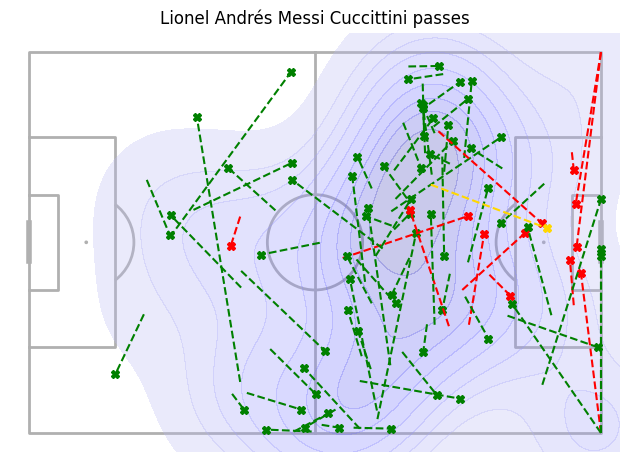

In [ ]:
filter_player_passes()

# Shots and goals

In [ ]:
# Create a function to get the shots and goals
def shots_function():
  # We ask the user to give the competition and season id, as well as the selected team
  compid = input('Select your competition id')
  seasonid= input('Select your season id')
  selected_team = input('Select your team')
  tournament = sb.matches(competition_id=compid,season_id=seasonid)
  team_home = tournament[tournament.home_team == selected_team]
  team_away = tournament[tournament.away_team == selected_team]
  total_matches = pd.concat([team_home,team_away])
  # We print the matches of that team during the tournament to see the ids of the matchs
  print(total_matches, flush = True) #Need to improve this part
  # We ask the user to give a match id after reading the possible matchs ids
  idmatch = input('Select your match id')
  soccer_match = sb.events(match_id = idmatch)
  home_team = soccer_match.team.unique()[0]
  away_team = soccer_match.team.unique()[1]
  # We start with the shots
  shots = soccer_match[soccer_match['type']=='Shot']
  h=120
  w=80
  team_1 = selected_team
  pitch = Pitch()
  fig, ax = pitch.draw()
  for i,shott in shots.iterrows():
    h=120
    w=80
    goal=shott['shot_outcome']=='Goal'
    team_name=shott['team']
    circleSize=2
    x=shott['location'][0]
    y=shott['location'][1]
    if (team_name==team_1):
        if goal:
            shotCircle=plt.Circle((x,w-y),circleSize,color="teal")
        else:
            shotCircle=plt.Circle((x,w-y),circleSize,color="lightblue")
            shotCircle.set_alpha(.2)
        ax.add_patch(shotCircle)
    else:
        if goal:
            shotCircle=plt.Circle((h-x,y),circleSize,color="mediumslateblue")
        else:
            shotCircle=plt.Circle((h-x,y),circleSize,color="plum")
            shotCircle.set_alpha(.2)
        ax.add_patch(shotCircle)
  subtitle = home_team + ' vs. ' + away_team
  plt.suptitle(subtitle)
  plt.title('Goals and shots')
  plt.show()
  print(subtitle)

Select your competition id11
Select your season id90
Select your teamBarcelona
    match_id  match_date      kick_off      competition     season  \
2    3773457  2021-05-16  18:30:00.000  Spain - La Liga  2020/2021   
6    3773660  2020-12-13  21:00:00.000  Spain - La Liga  2020/2021   
7    3773593  2020-09-27  21:00:00.000  Spain - La Liga  2020/2021   
9    3773585  2020-10-24  16:00:00.000  Spain - La Liga  2020/2021   
11   3773672  2020-10-04  21:00:00.000  Spain - La Liga  2020/2021   
14   3773377  2020-12-19  16:15:00.000  Spain - La Liga  2020/2021   
15   3773586  2021-04-29  19:00:00.000  Spain - La Liga  2020/2021   
16   3773372  2021-05-08  16:15:00.000  Spain - La Liga  2020/2021   
19   3773369  2021-03-15  21:00:00.000  Spain - La Liga  2020/2021   
20   3773661  2021-04-22  22:00:00.000  Spain - La Liga  2020/2021   
22   3773523  2020-12-16  21:00:00.000  Spain - La Liga  2020/2021   
26   3773526  2021-02-13  21:00:00.000  Spain - La Liga  2020/2021   
27   377347

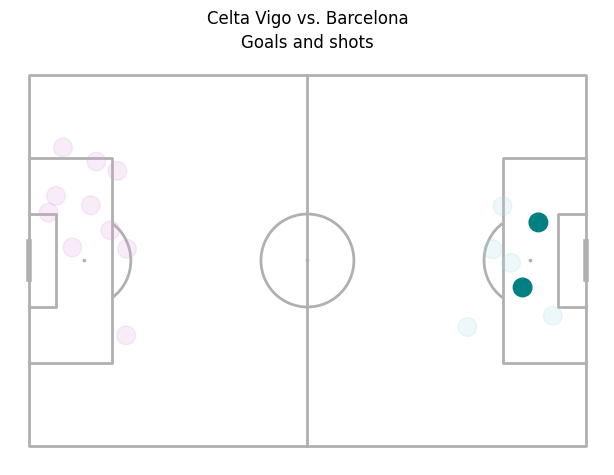

Celta Vigo vs. Barcelona


In [ ]:
shots_function()

# Sequence of the ball before goals - creation of animated gifs

In [ ]:
idmatch= 3773466

In [ ]:
soccer_match = sb.events(match_id = idmatch)
# We get the goals for the specified match
total_goals =soccer_match[soccer_match.shot_outcome=='Goal']
# We filter for the goals done before the penals
goals_match = total_goals[total_goals.minute<120]


In [ ]:
goals_match.index

Int64Index([3617, 3632], dtype='int64')

In [ ]:
goals_match[['minute','location','pass_end_location']]

,minute,location,pass_end_location
3617,10,"[106.3, 34.2]",NaN
3632,94,"[109.7, 48.2]",NaN


In [ ]:
# We generate the ball sequence for goal
ball_sequence_before_goal = {}

for i in range(0, len(goals_match)):
    ball_sequence = []
    goal = goals_match.index[i]
    # Considering that the previous observations may not correspond to immediate moments before the goal, we use an if statement to see if the time of the observation is less than 2 minutes before the goal.
    for j in range(goal-3, goal+1):
      if (soccer_match['minute'].iloc[goal]- soccer_match['minute'].iloc[j] <=2):
        ball_sequence.append(soccer_match['location'].iloc[j])

    ball_sequence_before_goal[i] = ball_sequence

In [ ]:
 ball_sequence_before_goal

{0: [[93.9, 22.1], [101.4, 21.9], [106.3, 34.2]],
 1: [[112.8, 28.1], [109.7, 48.2]]}

In [ ]:
# We filter those ball sequences that have at least 2 passes to show
filtered_ball_sequence = {key: values for key, values in ball_sequence_before_goal.items() if len(values) > 2}

In [ ]:
filtered_ball_sequence

{0: [[93.9, 22.1], [101.4, 21.9], [106.3, 34.2]]}

In [ ]:
import imageio
import os

In [ ]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)

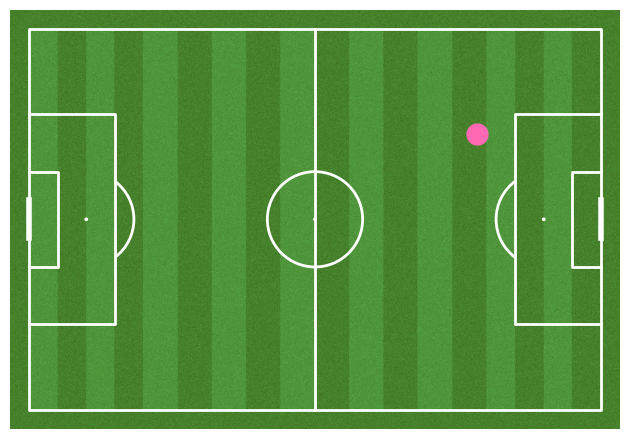

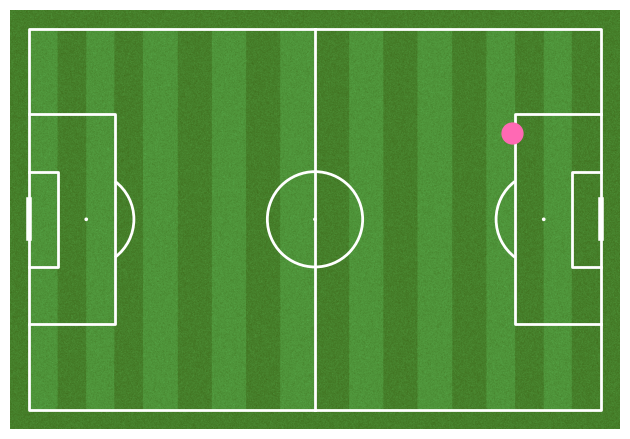

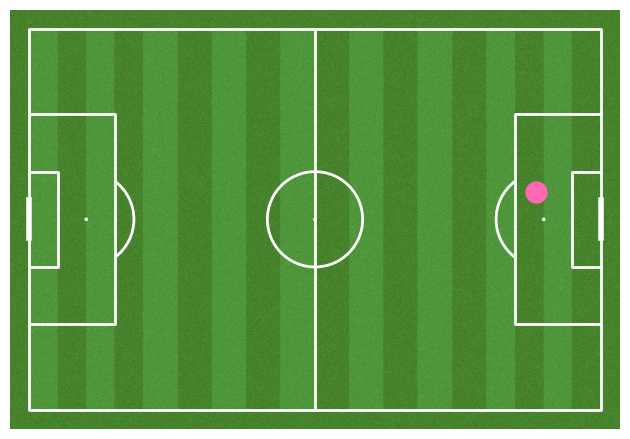

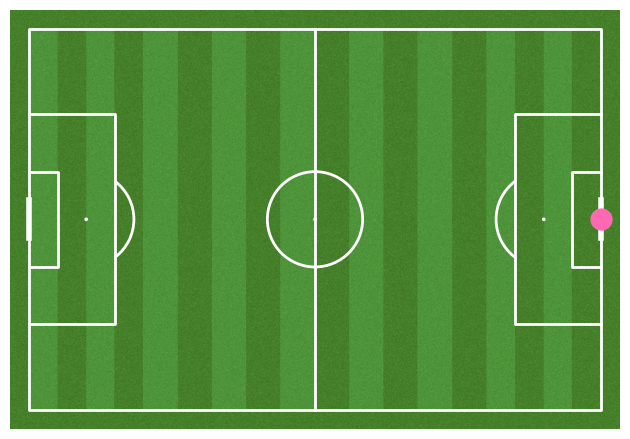

<ipython-input-39-289b08353858>:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(filename)


In [ ]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)



for key in filtered_ball_sequence.keys():
  filenames = []
  for value in filtered_ball_sequence.get(key):
    pitch.draw()
    plt.plot(value[0], value[1], color='hotpink', marker='o',markersize=15)

    filename = 'Ballsequence_{}.png'.format(value)
    filenames.append(filename)
    plt.savefig(filename,dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    # builing the gif
  #last position for goal
  pitch.draw()
  plt.plot(120, 40, color='hotpink', marker='o',markersize=15)

  filename = 'Ballsequence_{}.png'.format(value)
  filenames.append(filename)
  plt.savefig(filename,dpi=300, bbox_inches='tight')
  plt.show()
  plt.close()
  with imageio.get_writer('Ballsequence_'+str(key)+ '.gif', mode='I', duration=500) as writer: # the mode I is because it is interactive, the fps means images per second
    for filename in filenames:
      image=imageio.imread(filename)
      writer.append_data(image)
# remove files
  for filename in set(filenames):
    os.remove(filename)